#Power Comsumption

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#Exploratory Data Analysis

In [8]:
df=pd.read_excel("/content/drive/MyDrive/powerconsumption.xlsx")

In [4]:
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [6]:
df.dtypes

Datetime                  datetime64[ns]
Temperature                      float64
Humidity                         float64
WindSpeed                        float64
GeneralDiffuseFlows              float64
DiffuseFlows                     float64
PowerConsumption_Zone1           float64
PowerConsumption_Zone2           float64
PowerConsumption_Zone3           float64
dtype: object

In [7]:
df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [ ]:
df.nunique()

Datetime                  52416
Temperature                3437
Humidity                   4443
WindSpeed                   548
GeneralDiffuseFlows       10504
DiffuseFlows              10449
PowerConsumption_Zone1    27709
PowerConsumption_Zone2    29621
PowerConsumption_Zone3    22838
dtype: int64

In [ ]:
plot_kws={"s":2}
sns.pairplot(df, plot_kws={"s":2})

Output hidden; open in https://colab.research.google.com to view.

#Zone 3  Model 1

In [ ]:
data=df.copy()
data=data.iloc[:,[1,2,3,8]]
data.head()

,Temperature,Humidity,WindSpeed,PowerConsumption_Zone3
0,6.559,73.8,0.083,20240.96386
1,6.414,74.5,0.083,20131.08434
2,6.313,74.5,0.080,19668.43373
3,6.121,75.0,0.083,18899.27711
4,5.921,75.7,0.081,18442.40964


In [ ]:
df.describe()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,2017-07-01 23:55:00,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
min,2017-01-01 00:00:00,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,2017-04-01 23:57:30,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,2017-07-01 23:55:00,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,2017-09-30 23:52:30,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,2017-12-30 23:50:00,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360
std,NaN,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099


Text(0.5, 1.0, 'Feature Correlation Heatmap')

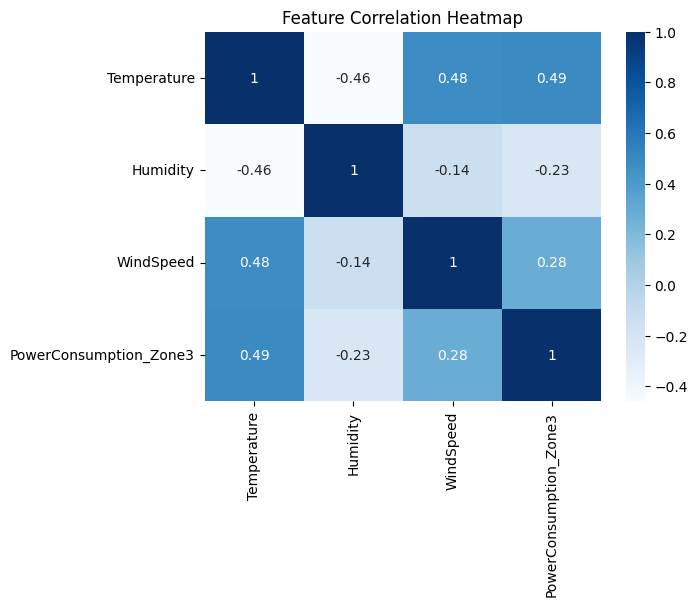

In [ ]:
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='Blues')
plt.title("Feature Correlation Heatmap")

# Temperture and Windspeed have a positive correlation while  Humidity has a negative corr.

In [ ]:
data['Temperature (Standard units)'] = (data['Temperature'] - np.mean(data['Temperature'])) / (np.std(data['Temperature']))
data['Humidity (Standard units)'] = (data['Humidity'] - np.mean(data['Humidity'])) / (np.std(data['Humidity']))
data['WindSpeed (Standard units)'] = (data['WindSpeed'] - np.mean(data['WindSpeed'])) / (np.std(data['WindSpeed']))
data.head()

,Temperature,Humidity,WindSpeed,PowerConsumption_Zone3,Temperature (Standard units),Humidity (Standard units),WindSpeed (Standard units)
0,6.559,73.8,0.083,20240.96386,-2.106645,0.356277,-0.798900
1,6.414,74.5,0.083,20131.08434,-2.131578,0.401291,-0.798900
2,6.313,74.5,0.080,19668.43373,-2.148946,0.401291,-0.800178
3,6.121,75.0,0.083,18899.27711,-2.181962,0.433443,-0.798900
4,5.921,75.7,0.081,18442.40964,-2.216353,0.478456,-0.799752


In [ ]:
random = data.sample(52416, replace = False)
training_set = random.iloc[0:5555, :]
test_set = random.iloc[5555:, :]
print (len(training_set))
print (len(test_set))

5555
46861


In [ ]:
# Linear Regression algorithm using the Scikit-Learn Library:

x=data.iloc[:, 0:3]  # Select columns 0 to 6 (7 is exclusive)
y=data.iloc[:, 3]   # Select the 7th column (index 6)
print(x.head())
print(y.head())

   Temperature  Humidity  WindSpeed
0        6.559      73.8      0.083
1        6.414      74.5      0.083
2        6.313      74.5      0.080
3        6.121      75.0      0.083
4        5.921      75.7      0.081
0    20240.96386
1    20131.08434
2    19668.43373
3    18899.27711
4    18442.40964
Name: PowerConsumption_Zone3, dtype: float64


In [ ]:
from sklearn.preprocessing import  StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x.astype(float))
x

array([[-2.10664461,  0.35627749, -0.7989004 ],
       [-2.13157832,  0.40129059, -0.7989004 ],
       [-2.14894594,  0.40129059, -0.80017763],
       ...,
       [-2.0480074 ,  0.29197306, -0.79762318],
       [-2.07242524,  0.30483395, -0.80017763],
       [-2.10303352,  0.37556882, -0.79975189]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.333333)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[3024.84336984  -85.14490715  378.08658842]
17834.73945981364


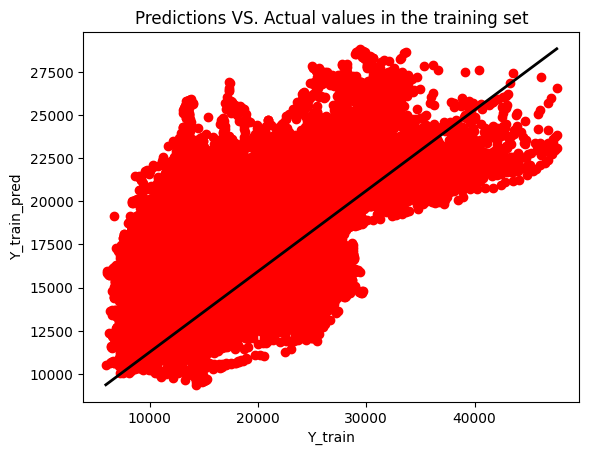

In [ ]:
y_train_pred = lr.predict(x_train)
plt.scatter(y_train, y_train_pred, c='r')  # Changed 'colors' to 'c'
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], c='black', lw=2)  # Changed 'colors' to 'c'
plt.xlabel('Y_train')
plt.ylabel('Y_train_pred')
plt.title("Predictions VS. Actual values in the training set")
plt.show()

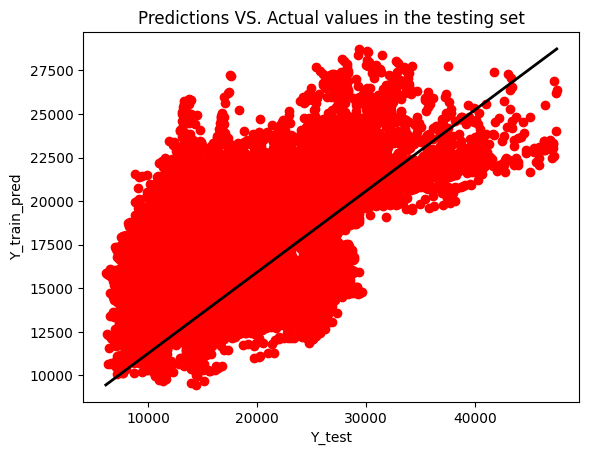

In [ ]:
y_train_pred = lr.predict(x_test)
plt.scatter(y_test, y_train_pred, c='r')  # Changed 'colors' to 'c'
plt.plot([y_test.min(), y_test.max()], [y_train_pred.min(), y_train_pred.max()], c='Black', lw=2)  # Changed 'colors' to 'c'
plt.xlabel('Y_test')
plt.ylabel('Y_train_pred')  # Changed ylabel to match the variable used
plt.title("Predictions VS. Actual values in the testing set")
plt.show()

In [ ]:
from sklearn import metrics
mse_train = metrics.mean_squared_error(y_test, y_train_pred)
rmse_train = np.sqrt(mse_train)
print(rmse_train)
print(mse_train)
# y_test_pred = lr.predict(x_test)  # Generate predictions on the test set
# rmse = metrics.mean_squared_error(y_test, y_test_pred, squared=False) # Calculate RMSE using test set predictions

# print("RMSE:", rmse)

7392.412508671726
54647762.698366195


In [ ]:
rmse_train

7392.412508671726

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100) # Use RandomForestRegressor for continuous target
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200)

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate predictions
y_pred = rf.predict(x_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 8659052.177102568
Root Mean Squared Error: 2942.626747839856
Mean Absolute Error: 1898.6808470393657
R-squared: 0.802222025588072


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # Example: K=5


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.333333)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred1 = kn.predict(x_test)


In [ ]:
from sklearn import metrics
mse_train = metrics.mean_squared_error(y_test, y_pred1)
rmse_train = np.sqrt(mse_train)
print(rmse_train)
print(mse_train)

5115.687032338017
26170253.812831346


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.333333)


In [ ]:
from sklearn import svm
from sklearn.svm import SVR # Import the SVC class for Support Vector Classification

svm_model = SVR() # Instantiate the SVC model
svm_model.fit(x_train, y_train)

SVR()

In [ ]:
y_pred2 = svm_model.predict(x_test)


In [ ]:
from sklearn import metrics
mse_train = metrics.mean_squared_error(y_test, y_pred)
rmse_train = np.sqrt(mse_train)
print(rmse_train)
print(mse_train)

8255.036707673544
68145631.04503767


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df['PowerConsumption_Zone3'] = imputer.fit_transform(df[['PowerConsumption_Zone3']])


In [ ]:
from scipy.stats import zscore

# Detect outliers using z-score
z_scores = zscore(df['PowerConsumption_Zone3'])
df_no_outliers = df[(z_scores < 3) & (z_scores > -3)]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.333333)
lr=LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [ ]:
from sklearn import metrics
mse_train = metrics.mean_squared_error(y_test, y_train_pred)
rmse_train = np.sqrt(mse_train)
print(rmse_train)
print(mse_train)
# y_test_pred = lr.predict(x_test)  # Generate predictions on the test set
# rmse = metrics.mean_squared_error(y_test, y_test_pred, squared=False) # Calculate RMSE using test set predictions

# print("RMSE:", rmse)

7392.412508671726
54647762.698366195


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100) # Use RandomForestRegressor for continuous target
rf.fit(x_train, y_train)